In [ ]:
pip install yfinance

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [21]:
tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period='max')
print(tesla_data.reset_index(inplace=True))
print(tesla_data.head())

None
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [22]:
tesla_revenue=tesla_data.tail()
print(tesla_revenue)

                          Date        Open        High         Low  \
3504 2024-05-31 00:00:00-04:00  178.500000  180.320007  173.820007   
3505 2024-06-03 00:00:00-04:00  178.130005  182.639999  174.490005   
3506 2024-06-04 00:00:00-04:00  174.779999  177.759995  174.000000   
3507 2024-06-05 00:00:00-04:00  175.350006  176.149994  172.130005   
3508 2024-06-06 00:00:00-04:00  174.600006  179.729996  172.729996   

           Close    Volume  Dividends  Stock Splits  
3504  178.080002  67314600        0.0           0.0  
3505  176.289993  68568900        0.0           0.0  
3506  174.770004  60056300        0.0           0.0  
3507  175.000000  57953800        0.0           0.0  
3508  177.940002  69578400        0.0           0.0  


In [57]:
gamestock=yf.Ticker('GME') 
gme_data=gamestock.history(period='max')
print(gme_data.reset_index(inplace=True))
print(gme_data.head())

None
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670627  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


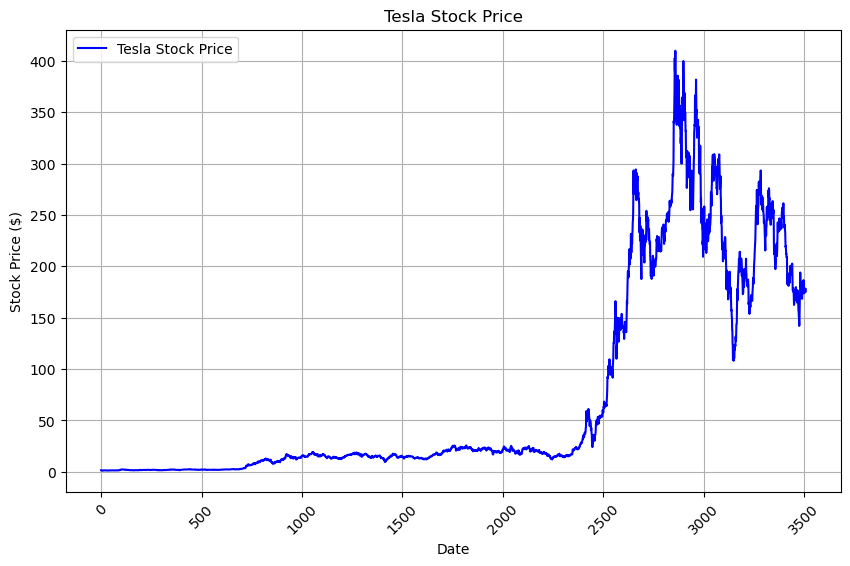

In [31]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
title="Tesla Stock Price"
make_graph(tesla_data, title)

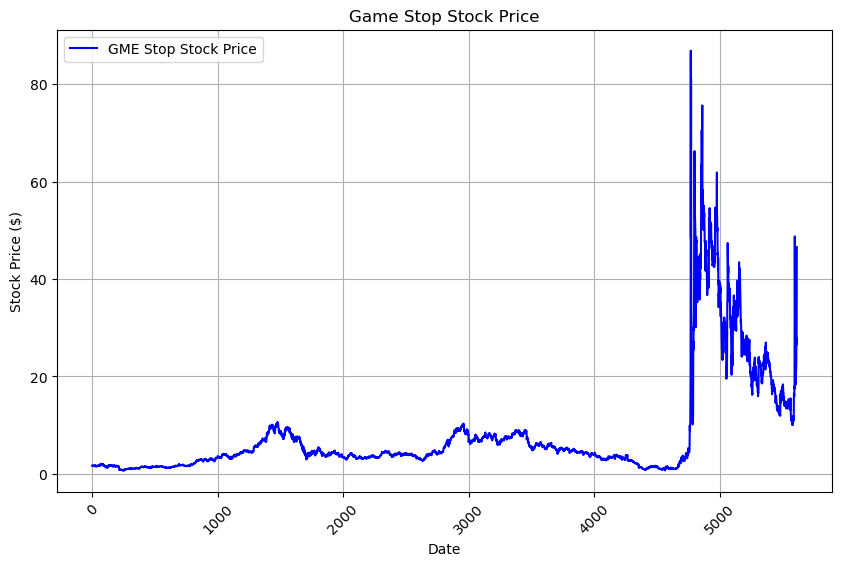

In [33]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='GME Stop Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
title="Game Stop Stock Price"
make_graph(gme_data, title)

In [64]:
# Question 4 WEBSCRAPPING OF GME DATA
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data=requests.get(url).text
soup=BeautifulSoup(data,'html')
gme_data = pd.DataFrame(columns=["Quarter", "Revenue"])
revenue_table = soup.find("table")
rows = revenue_table.find_all("tr")
for row in rows[1:]:  # Skip the header row
        cells = row.find_all("td")
        quarter = cells[0].text.strip()
        revenue = cells[1].text.strip()
        gme_data = gme_data.append({"Quarter": quarter, "Revenue": revenue}, ignore_index=True)
        print(gme_data.tail())

  Quarter  Revenue
0    2021  $53,823
  Quarter  Revenue
0    2021  $53,823
1    2020  $31,536
  Quarter  Revenue
0    2021  $53,823
1    2020  $31,536
2    2019  $24,578
  Quarter  Revenue
0    2021  $53,823
1    2020  $31,536
2    2019  $24,578
3    2018  $21,461
  Quarter  Revenue
0    2021  $53,823
1    2020  $31,536
2    2019  $24,578
3    2018  $21,461
4    2017  $11,759
  Quarter  Revenue
1    2020  $31,536
2    2019  $24,578
3    2018  $21,461
4    2017  $11,759
5    2016   $7,000
  Quarter  Revenue
2    2019  $24,578
3    2018  $21,461
4    2017  $11,759
5    2016   $7,000
6    2015   $4,046
  Quarter  Revenue
3    2018  $21,461
4    2017  $11,759
5    2016   $7,000
6    2015   $4,046
7    2014   $3,198
  Quarter  Revenue
4    2017  $11,759
5    2016   $7,000
6    2015   $4,046
7    2014   $3,198
8    2013   $2,013
  Quarter Revenue
5    2016  $7,000
6    2015  $4,046
7    2014  $3,198
8    2013  $2,013
9    2012    $413
   Quarter Revenue
6     2015  $4,046
7     2014  $3,198